In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *

import warnings
warnings.filterwarnings('ignore')

from plotnine import *
import plotnine as p9
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import missingno as msno

In [26]:
pip install missingno

  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
Note: you may need to restart the kernel to use updated packages.


## Вариант 2
## Датасет №16 "Болезни сердца"

In [15]:
df = pd.read_csv('Heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1.0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1.0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1.0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1.0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1.0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1.0


#### Описание датасета
+ age: возраст
+ пол: пол (1 = мужской, 0 = женский)
+ cp: тип боли (0 = типичная стенокардия; 1 = атипичная стенокардия; 2 = не стенокардия; 3 = симптомы отсутствуют)
+ trestbps: артериальное давление в состоянии покоя (Объяснение: частота сердечных сокращений в состоянии покоя означает количество ударов сердца в минуту в бодрствующем, неактивном и спокойном состоянии. Артериальное давление в состоянии покоя - это артериальное давление, измеренное в этом состоянии)
+ chol: холестерин
+ fbs: Уровень глюкозы в крови человека натощак (> 120 мг / дл = 1; 0 = ложь) Объяснение: Уровень глюкозы в крови натощак (уровень сахара в крови перед едой / перед едой): 80–130 мг / дл. После еды Уровень глюкозы в крови через 2 часа: 80-160 мг / дл.)
+ restecg: ЭКГ (0 = нормальный, 1 = аномальный ST-T, 2 = в соответствии со стандартом Эстеса, показывающий возможную или определенную гипертрофию левого желудочка, тяжелое состояние)
+ thalach: максимальная частота пульса
+ exang: стенокардия, вызванная физическими упражнениями (1 = да; 0 = нет)
+ oldpeak: Подавление сегмента ST, вызванное упражнением относительно отдыха. Пояснение: (http://heart.dxy.cn/article/143557)
+ slope: наклон: ЭКГ при максимальной нагрузке (1 = подъем, 2 = ровный, 3 = спуск)
+ ca: количество основных кровеносных сосудов с флуоресцентным цветом (0-4). Флуоресцентный цвет в основном связан с диабетом.
+ thal: заболевание крови, называемое талассемией (3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект)
+ target: болезнь сердца (0 = нет, 1 = да)

## Первичный анализ данных

Проверим пропоску при помощи тепловой карты пропущенных значений.
Определим цвета (желтый - пропущенные данные, синий - не пропущенные)

<AxesSubplot:>

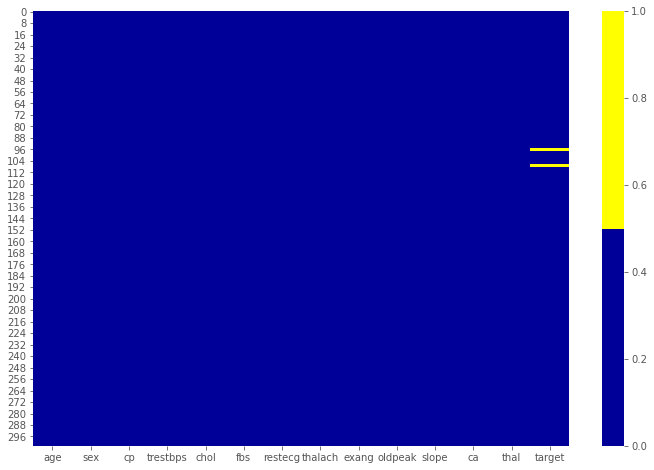

In [16]:
colours = ['#000099', '#ffff00'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

Мы видим, что пропусков нет. Здесь нет ошибки в цветах, когда датасет без пропусков, происходит инверсия цвета. Но стоит добавить хотя бы 1 пропуск и все отобразится в соответсвии с описанием выше.

<AxesSubplot:>

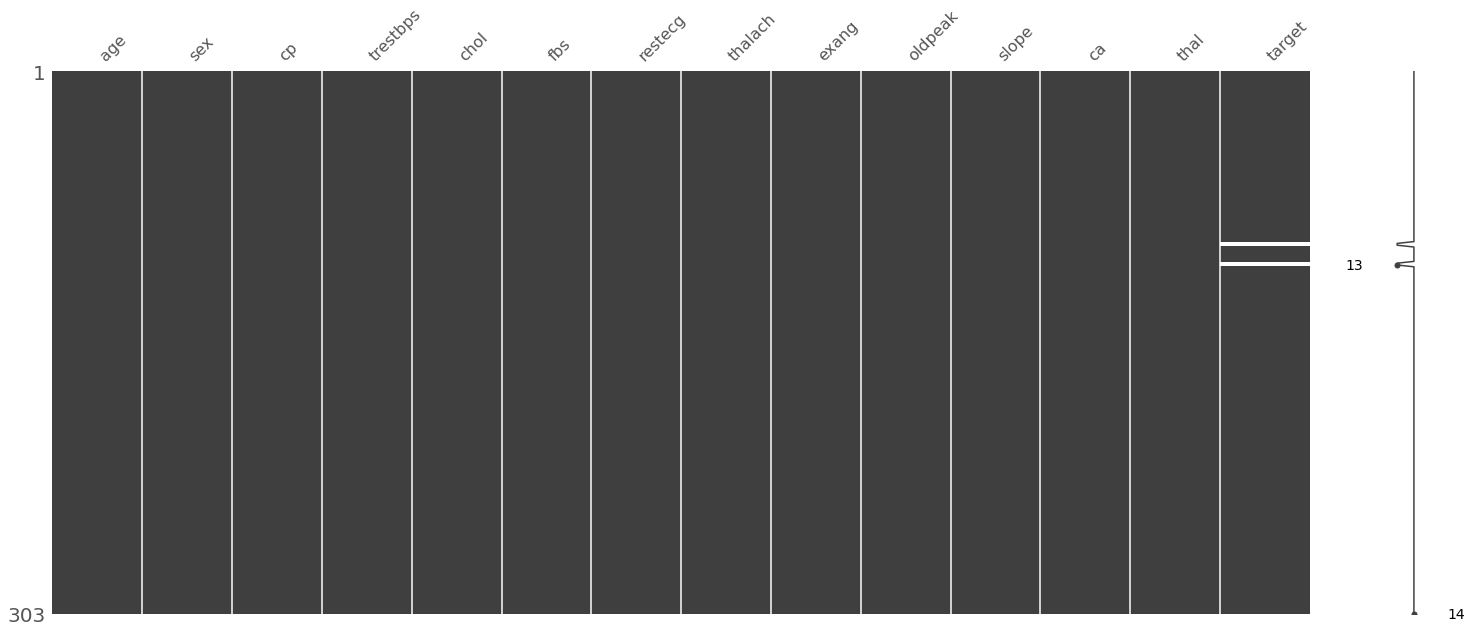

In [17]:
# Также можно проверить датасет на пропуски при помощи библиотеки missingo
msno.matrix(df)

Для оценки выбросов построим ящики с усами для всех признаков (исключая лишь те, где категории значений закодированы цифрами)

In [42]:
df_int = df.drop(['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'fbs'], axis=1)
df_int

,age,trestbps,chol,thalach
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163
...,...,...,...,...
298,57,140,241,123
299,45,110,264,132
300,68,144,193,141
301,57,130,131,115


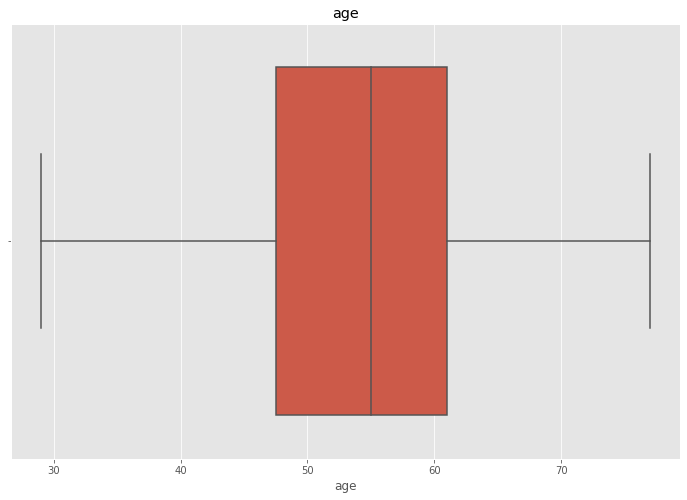

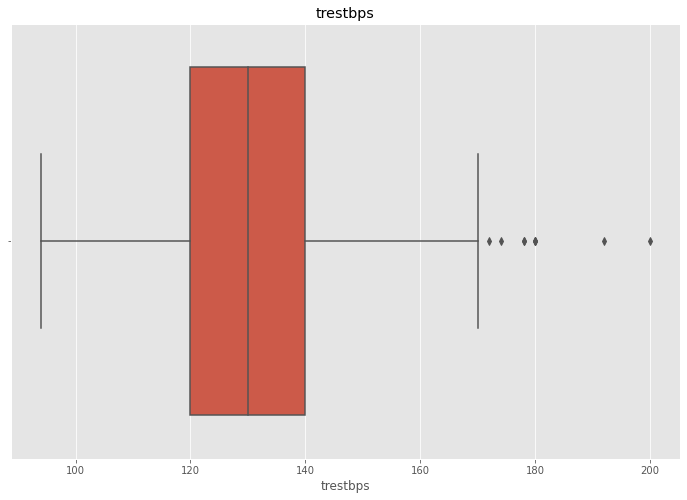

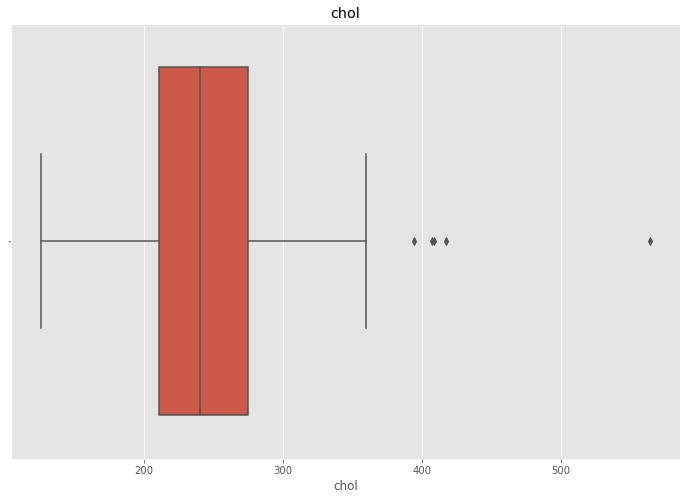

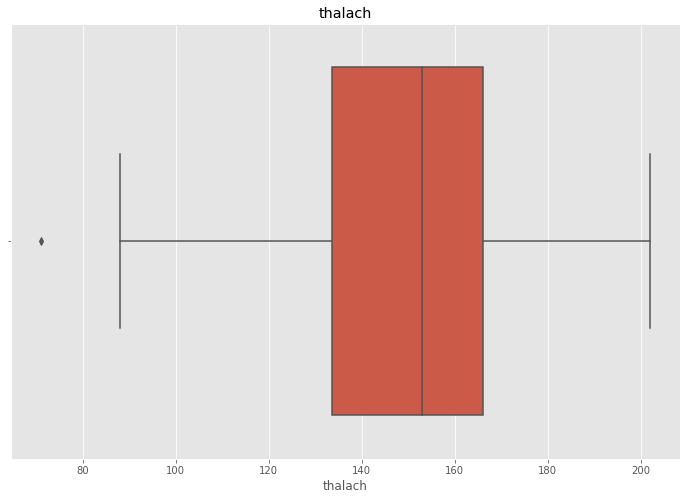

In [48]:
for idx,col in enumerate(df_int.columns[:]):
    sns.boxplot(x=df_int[col])
    plt.title(col)
    plt.show()

Мы видим наличине выбросов по трем показателям: холестерин, глюкоза, артериальное давление и максимальная частота пульса.

Проверим признаки на коллинеарность.

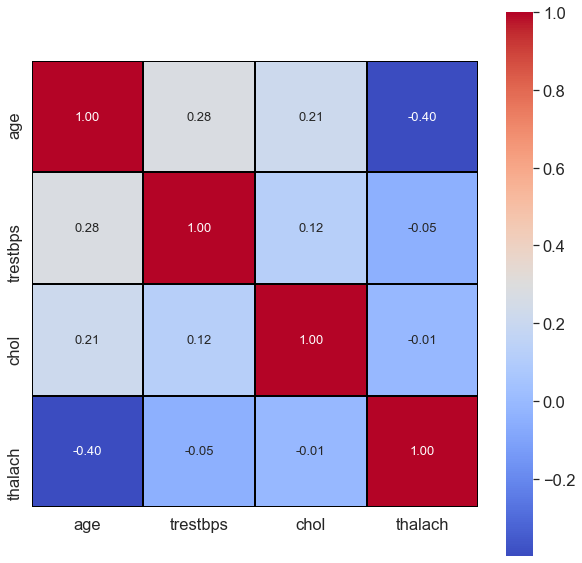

In [52]:
cont_df = df_int.select_dtypes(include=["int64", "float64"])
plt.subplots(figsize=(10,10)) 
sns.set(font_scale=1.5) 
hm = sns.heatmap(cont_df.corr(), 
                 cbar=True,
                 annot=True,
                 annot_kws={'size': 13},
                 square=True,
                 fmt='.2f',
                 cmap="coolwarm",
                 linewidths=1,
                 linecolor='black')
plt.show()

Видим, что возраст и максимальная частота пульса имеют высокую (отрицательную)взаимную корреляцию.

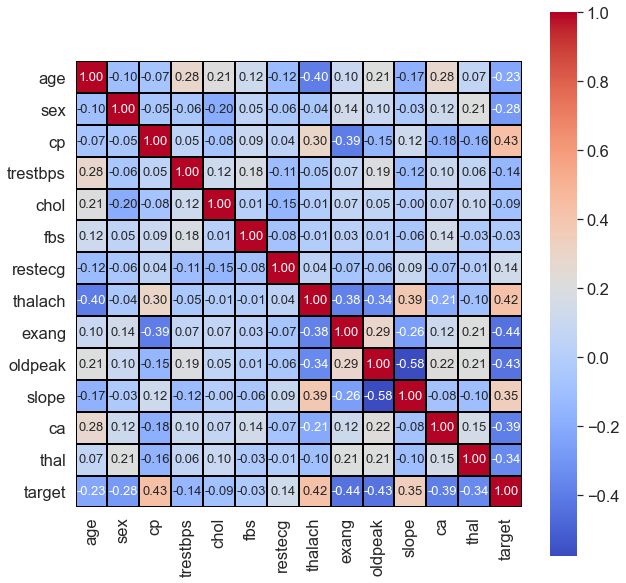

In [54]:
cont_df = df.select_dtypes(include=["int64", "float64"])
plt.subplots(figsize=(10,10)) 
sns.set(font_scale=1.5) 
hm = sns.heatmap(cont_df.corr(), 
                 cbar=True,
                 annot=True,
                 annot_kws={'size': 13},
                 square=True,
                 fmt='.2f',
                 cmap="coolwarm",
                 linewidths=1,
                 linecolor='black')
plt.show()

In [55]:
# Для наглядности отобразим признаки лишь с высокой (относительно) коллинепрностью >= 0.28)
max_col = cont_df.corr().applymap(lambda x: x if (x>=0.28) else 0)

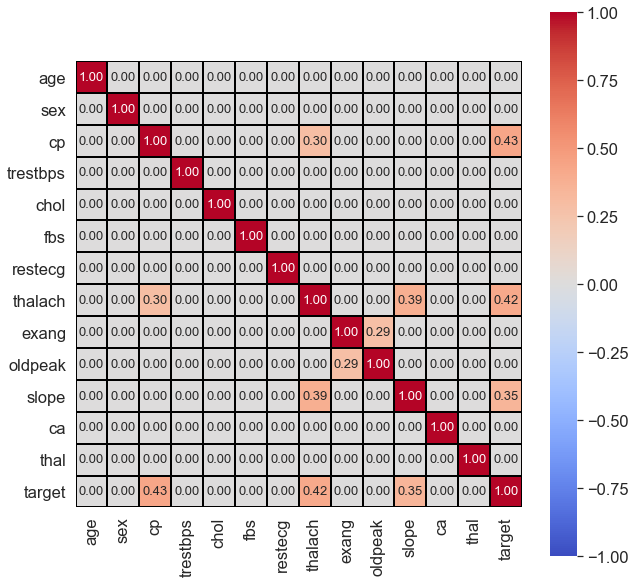

In [56]:
plt.subplots(figsize=(10,10)) 
sns.set(font_scale=1.5) 
hm = sns.heatmap(max_col, 
                 cbar=True,
                 annot=True,
                 annot_kws={'size': 13},
                 square=True,
                 fmt='.2f',
                 cmap="coolwarm",
                 linewidths=1,
                 vmax=1.0,
                 vmin=-1.0,
                 linecolor='black')
plt.show()

## Зависимости

Визуализируем зависимости всех признаков при помощи pairplot:

<Figure size 1200x1200 with 0 Axes>

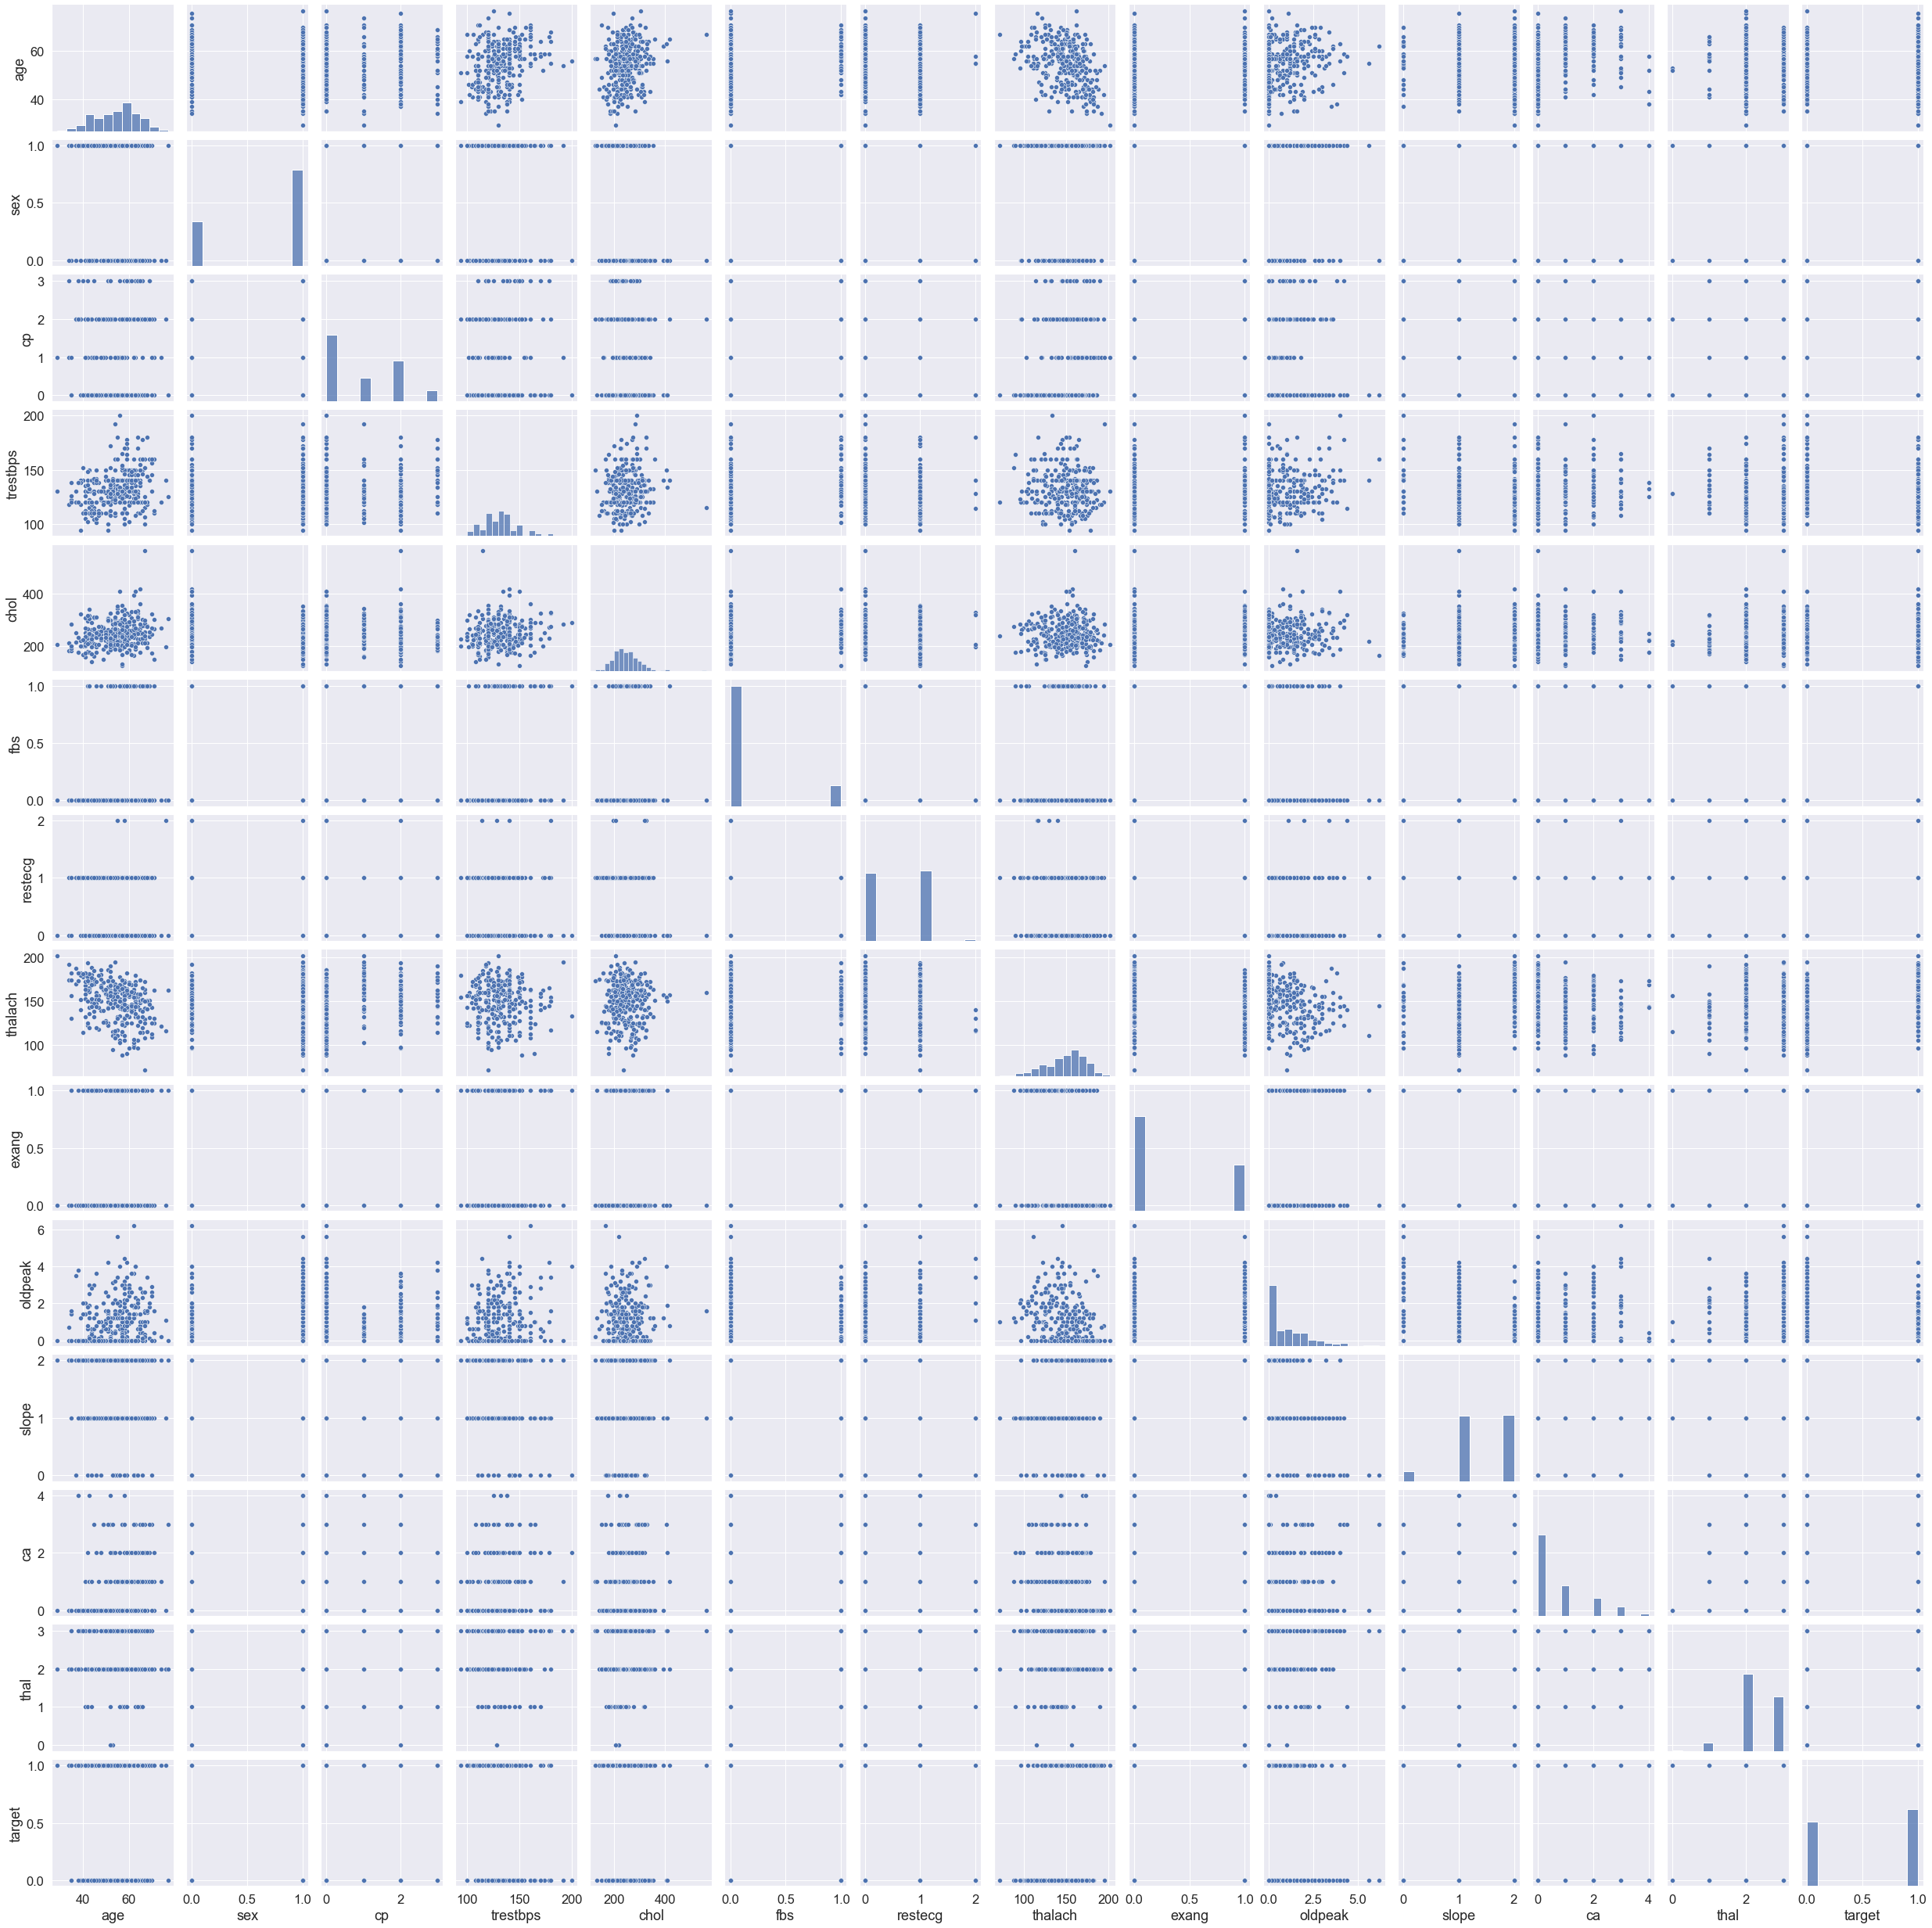

In [59]:
plt.figure(figsize=(15,15), dpi= 80)
sns.pairplot(df)
plt.show()

Рассмотрим внимательнее признаки, где корреляция прослеживается Это уже выявленные нами ранее возраст\максимальная частота пульса. Обратная корреляция закономерна и подтверждается формулой расчета "220 — ваш возраст = максимальный пульс".

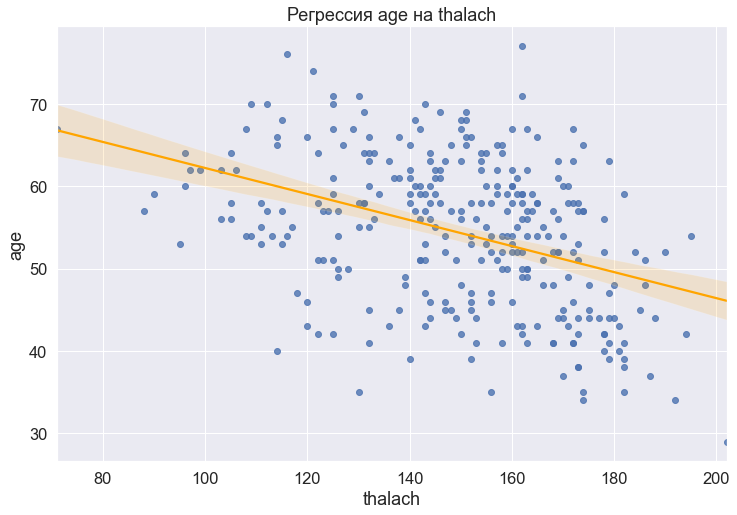

In [60]:
plt.title('Регрессия age на thalach')
sns.regplot(x='thalach',y='age', data=df,line_kws={"color": "orange"})
plt.show()

Из рисунка ниже также видим, что тенденция сердечного ритма с возрастом постоянно снижается. Поскольку у людей с заболеванием частота сердечных сокращений выше, это подтверждает гипотезу о том, что более высокая частота сердечных сокращений на самом деле более подвержена сердечным заболеваниям.

Text(0.5, 0, 'поколение')

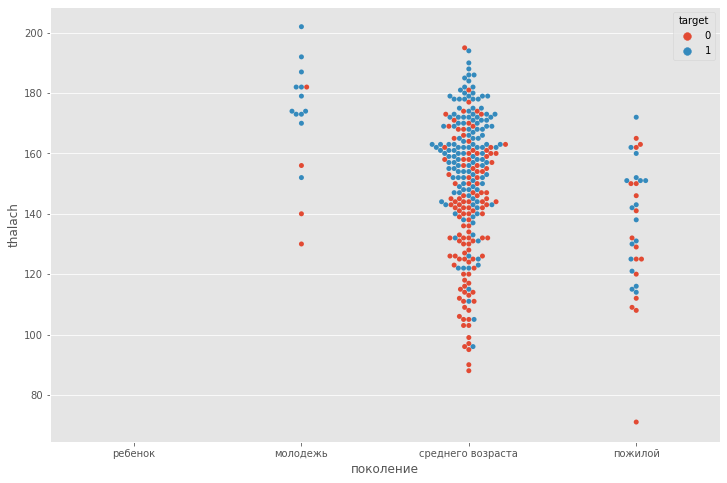

In [11]:
df['age_range']=pd.cut(df['age'],bins=[0,18,40,66,200],include_lowest=True,right=False,\
                             labels=['ребенок','молодежь','среднего возраста','пожилой'])
ax=sns.swarmplot(x='age_range',y='thalach',data=df,hue='target')
ax.set_xlabel("поколение")

А вот возраст и холестирин имеют слабую положительную корреляцию.

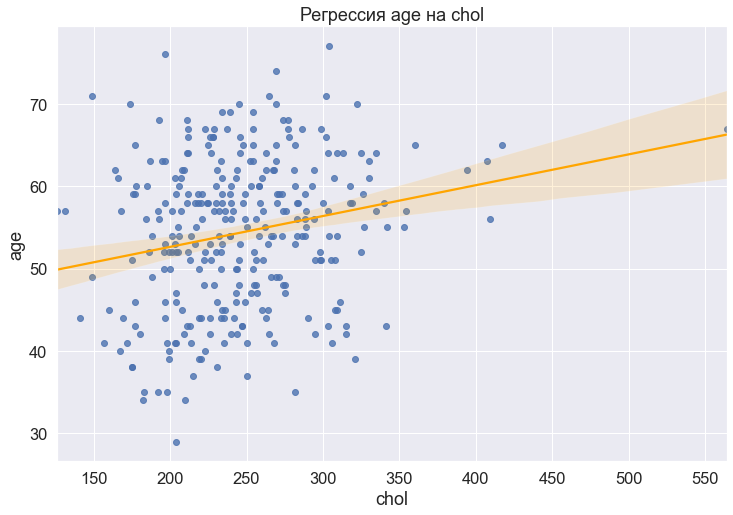

In [61]:
plt.title('Регрессия age на chol')
sns.regplot(x='chol',y='age', data=df,line_kws={"color": "orange"})
plt.show()

Визуализируем зависимость целевой переменной от значимых признаков. При помощи тепловой карты мы выявили сильное влияние признака cp (тип боли, где: 0 = типичная стенокардия; 1 = атипичная стенокардия; 2 = не стенокардия; 3 = симптомы отсутствуют).

Text(0.5, 1.0, 'Типы боли в груди')

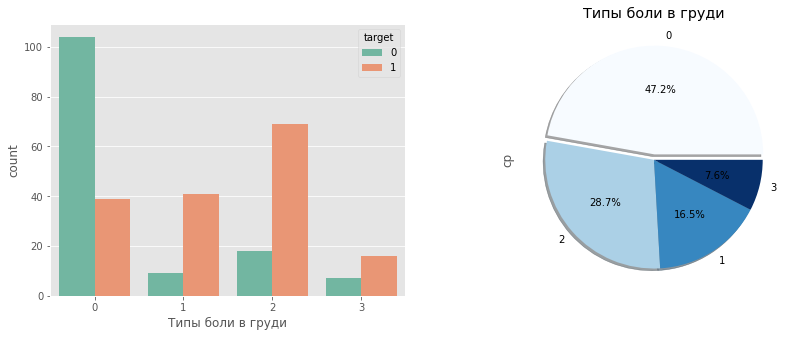

In [14]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=df,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("Типы боли в груди")
df.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.05,0,0,0],shadow=True, cmap='Blues')
ax[1].set_title("Типы боли в груди")

Из рисунка видно, что люди, не страдающие болезнью сердца, в основном имеют боль типа 0, но пациенты в основном имеют боль типа 1–3. Это показывает, что уровень боли действительно связан с сердечным заболеванием, но каждый конкретный случай следует анализировать в зависимости от реальной ситуации. 

Посмотрим влияние признака "Пол" на целевую метку. Из рисунка ниже видно, что женщины больше страдают от болезней сердца, нежели мужчины.

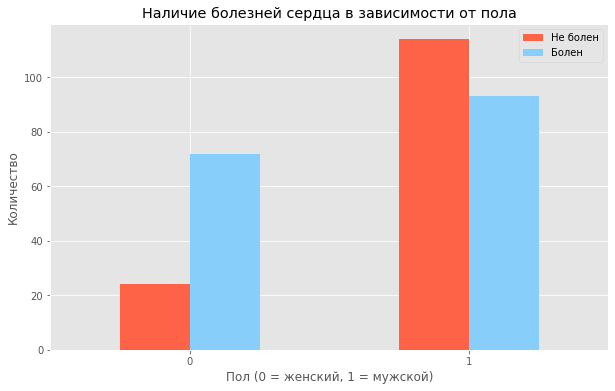

In [7]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,6),color=['tomato', 'lightskyblue' ])
plt.title('Наличие болезней сердца в зависимости от пола')
plt.xlabel('Пол (0 = женский, 1 = мужской)')
plt.xticks(rotation=0)
plt.legend(["Не болен", "Болен"])
plt.ylabel('Количество')
plt.show()

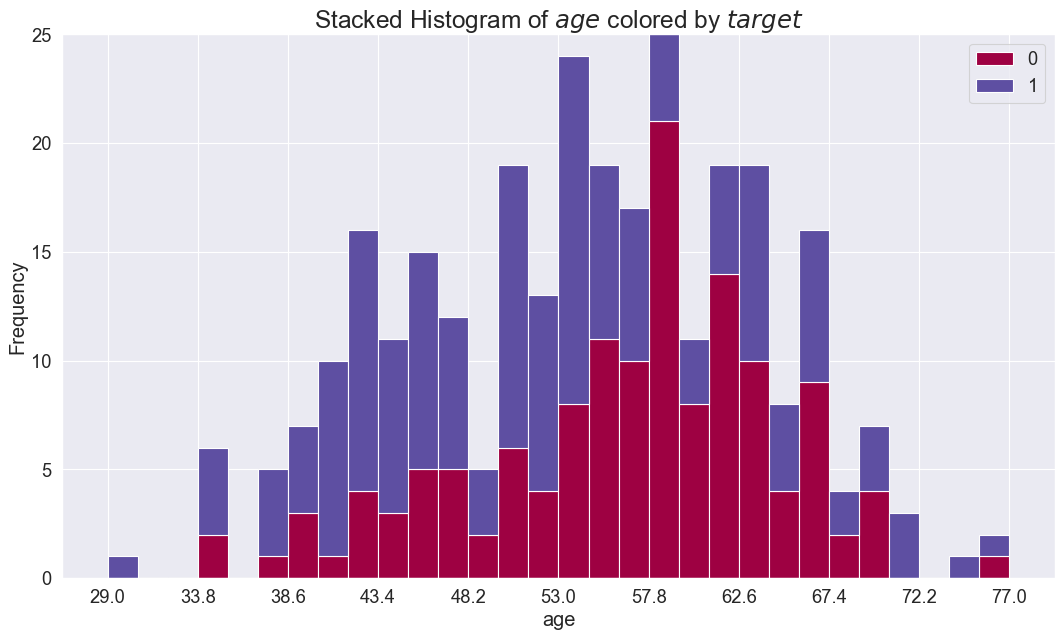

In [72]:
x_var = 'age'
groupby_var = 'target'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

На графике выше видим, что люди среднего возраста (от 30 до 50 лет) обращаются к доктору (= попадают в нашу выборку) реже, чем люди старшего возраста, но при этом идут к врачу когда болезнь с высокой долей вероятности есть, то есть с явными симптомами. Люди старшего и пожилого возраста наблюдают за своим здоровьем пристальнее и обследуются даже имея здорове сердце.
Обращения молодых людей (до 30 лет) в 100 процентах случаев связаны с наличием болезни.